In [1]:
import numpy as np
import matplotlib.pyplot as plt

run_no = 'NEW 20200427'

In [2]:
file_dicts = []
for i in range(1, 50+1):
    start = 1 + (i-1)*10
    end = start + 9
    if i % 10 == 1:
        print(i, '...')
        print('./20200427_new_sipm_saturation_tests/file'+str(start)+'_'+str(end)+'.txt')
    myfile = open('./20200427_new_sipm_saturation_tests/file'+str(start)+'_'+str(end)+'.txt', 'r')
    started = False
    file_dict = {}
    for line in myfile.readlines():
        if started:
            name = line[:line.find(':')]
            obj = eval(line[line.find(':')+1:])
            if i == 1:
                print(name)
                print(obj)
            file_dict[name] = obj
        else:
            started = True
    file_dicts.append(file_dict)
    myfile.close()

1 ...
./20200427_new_sipm_saturation_tests/file1_10.txt
xyz_boxes
[([-175.0, -58.33333333333333], [-175.0, -58.33333333333333], [0.0, 166.66666666666666]), ([-175.0, -58.33333333333333], [-175.0, -58.33333333333333], [166.66666666666666, 333.3333333333333]), ([-175.0, -58.33333333333333], [-175.0, -58.33333333333333], [333.3333333333333, 500.0]), ([-175.0, -58.33333333333333], [-58.33333333333333, 58.33333333333334], [0.0, 166.66666666666666]), ([-175.0, -58.33333333333333], [-58.33333333333333, 58.33333333333334], [166.66666666666666, 333.3333333333333]), ([-175.0, -58.33333333333333], [-58.33333333333333, 58.33333333333334], [333.3333333333333, 500.0]), ([-175.0, -58.33333333333333], [58.33333333333334, 175.0], [0.0, 166.66666666666666]), ([-175.0, -58.33333333333333], [58.33333333333334, 175.0], [166.66666666666666, 333.3333333333333]), ([-175.0, -58.33333333333333], [58.33333333333334, 175.0], [333.3333333333333, 500.0]), ([-58.33333333333333, 58.33333333333334], [-175.0, -58.33333

In [3]:
len(file_dicts)

50

In [4]:
xyz_boxes = file_dicts[0]['xyz_boxes']

In [5]:
rings = list(file_dicts[0]['S1_matrix_PMT'].keys())
rings.sort()
print(rings)

[70.0, 185.0]


In [6]:
box_totals = [sum([file_dict['Num_events_per_box'][box_i] for file_dict in file_dicts]) for box_i in range(len(xyz_boxes))]
print(box_totals)
print('Length =', len(box_totals))

[1407, 1346, 1369, 1517, 1568, 1524, 1363, 1346, 1334, 1579, 1608, 1523, 1651, 1573, 1516, 1517, 1544, 1604, 1347, 1386, 1388, 1584, 1566, 1516, 1335, 1370, 1461]
Length = 27


In [7]:
# Pseudoaverage - weighted by file, instead of numbe of events
S1_matrix_PMT_pavg = {ring:sum([np.array(file_dict['S1_matrix_PMT'][ring]) for file_dict in file_dicts])/len(file_dicts) for ring in rings}
print(S1_matrix_PMT_pavg)

{70.0: array([1.52841754, 1.36896893, 1.57577946, 1.61767645, 1.34475796,
       1.58144113, 1.39261399, 1.30170069, 1.59776547, 1.34468114,
       1.34335997, 1.59596289, 1.58377375, 1.37965647, 1.59270324,
       1.2504759 , 1.33189781, 1.59241729, 1.50961584, 1.33623843,
       1.59953436, 1.31895094, 1.3195087 , 1.5791207 , 1.40344369,
       1.31770981, 1.60490895]), 185.0: array([1.20639773, 0.95644435, 1.11214345, 1.19977209, 0.93502503,
       1.08362085, 1.07372505, 0.96766543, 1.10949032, 1.00127377,
       0.94666575, 1.06527723, 1.10610208, 0.93618227, 1.03065141,
       0.94687656, 0.94395231, 1.0786699 , 1.1458048 , 0.97533687,
       1.096914  , 0.97281103, 0.94440243, 1.07365061, 1.08673436,
       0.97850316, 1.09867148])}


In [8]:
# Pseudoaverage - weighted by file, instead of numbe of events
S2_matrix_PMT_pavg = {ring:sum([np.array(file_dict['S2_matrix_PMT'][ring]) for file_dict in file_dicts])/len(file_dicts) for ring in rings}
print(S2_matrix_PMT_pavg)

{70.0: array([377.75180207, 372.44126632, 364.10356913, 443.00322656,
       436.49589553, 431.04704485, 380.56376895, 373.31243938,
       367.2072133 , 441.94185564, 435.93701454, 428.15100454,
       493.1137175 , 486.18211135, 480.34690709, 436.41437175,
       432.02626246, 427.45968702, 385.98770448, 375.37155637,
       370.10667414, 436.28463515, 429.5867954 , 424.99978165,
       386.81147786, 380.86358504, 372.78634283]), 185.0: array([306.04361178, 301.66417026, 293.91208515, 323.89641916,
       319.8667958 , 315.46580271, 305.8901979 , 300.43957171,
       294.91194153, 324.51900973, 320.01472881, 315.2255719 ,
       333.26036208, 329.04611494, 324.91637664, 323.75188657,
       319.84672112, 315.64895184, 307.90278058, 300.0752723 ,
       295.19606469, 324.06565947, 319.6105204 , 314.80885813,
       306.53372353, 300.93079226, 294.7199176 ])}


In [9]:
Mean_maxperus_sipm_box = [ sum([file_dict['Mean_maxperus_sipm_box'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(Mean_maxperus_sipm_box)

[18.902629708599857, 9.693164933135215, 6.852447041636231, 19.145682267633486, 9.746173469387756, 6.8484251968503935, 18.877476155539252, 9.723625557206537, 6.872563718140929, 18.993033565547815, 9.698383084577115, 6.902823374917925, 19.05451241671714, 9.748887476160203, 6.849604221635884, 19.03493737640079, 9.773963730569948, 6.896508728179551, 18.91907943578322, 9.669552669552669, 6.906340057636887, 19.029040404040405, 9.770753512132822, 6.9736147757255935, 18.73932584269663, 9.637956204379561, 6.860605631475843]


In [10]:
Std_maxperus_sipm_box = [ sum([file_dict['Std_maxperus_sipm_box'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(Std_maxperus_sipm_box)

[7.529205492621795, 2.5091435095846113, 1.665967535460505, 7.381000114380515, 2.448075247366075, 1.657892718479952, 7.495165467010449, 2.4554201806316436, 1.6577713237688527, 7.487109487108741, 2.4273179295625953, 1.6672355580645135, 7.108422014761105, 2.5256651960275933, 1.660095937903143, 7.588326959701894, 2.3971528779922493, 1.6881854247932013, 7.397475115172324, 2.534094803557659, 1.6998794892828213, 7.406478369709481, 2.5260824492099894, 1.7299565915001518, 7.083269170750183, 2.451971039985102, 1.6968598194388678]


In [11]:
S1s_SiPMs_avg = [ sum([file_dict['S1s_SiPMs'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(S1s_SiPMs_avg)

[1.6936744847192609, 0.6976225854383358, 0.5120525931336742, 1.6242584047462096, 0.7040816326530612, 0.5072178477690289, 1.4225972120322816, 0.736998514115899, 0.46926536731634183, 1.2368587713742876, 0.6977611940298507, 0.49573210768220616, 1.5414900060569352, 0.670057215511761, 0.49274406332453824, 1.1891891891891893, 0.7020725388601037, 0.5018703241895262, 1.6169265033407572, 0.6875901875901876, 0.4819884726224784, 1.1963383838383839, 0.6768837803320562, 0.48350923482849606, 1.304868913857678, 0.7072992700729926, 0.5277207392197125]


In [12]:
S2s_SiPMs_avg = [ sum([file_dict['S2s_SiPMs'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(S2s_SiPMs_avg)

[535.5650319829424, 526.7882615156018, 514.4083272461651, 566.9215557020435, 558.8220663265306, 551.7913385826772, 535.4101247248716, 525.1998514115899, 515.5967016491754, 566.6402786573781, 558.0597014925373, 552.0347997373605, 581.3422168382798, 573.9243483788938, 565.1800791556728, 565.5451549110086, 559.0518134715026, 551.5187032418953, 536.8827023014105, 524.038961038961, 515.2096541786743, 565.91351010101, 559.8071519795658, 552.065963060686, 535.2808988764045, 525.5839416058394, 515.4031485284052]


In [13]:
Mean_max_sipm_box_avg = [ sum([file_dict['Mean_max_sipm_box'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(Mean_max_sipm_box_avg)

[50.36460554371002, 33.81723625557206, 26.557341124908692, 51.23269611074489, 34.139030612244895, 26.791338582677167, 50.4446074834923, 33.844725111441306, 26.632683658170915, 50.71120962634579, 33.98756218905473, 26.741300065659882, 50.99030890369473, 34.19898283534647, 26.810686015831134, 50.82267633487146, 34.11787564766839, 26.752493765586035, 50.32813659985152, 33.57287157287157, 26.511527377521613, 50.94065656565657, 34.106641123882504, 26.92282321899736, 50.30711610486891, 33.84890510948905, 26.574571030706416]


In [14]:
xy_bins = set({})
z_bins = set({})
for box in xyz_boxes:
    xb = tuple(box[0])
    yb = tuple(box[1])
    zb = tuple(box[2])
    xy_bins.add((xb, yb))
    z_bins.add(zb)

In [15]:
import itertools as it
def get_index_from_box(mybox, myboxes):
    for myi_box, mytest_box in zip(range(len(myboxes)), myboxes):
        box_equal = True
        for i, j in it.product(range(3), range(2)):
            if not mytest_box[i][j] == mybox[i][j]:
                box_equal = False
        if box_equal:
            return myi_box
    return -1

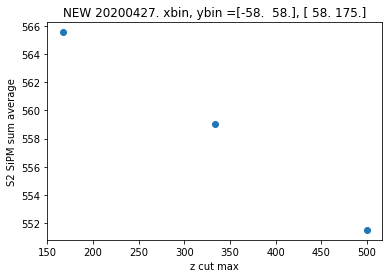

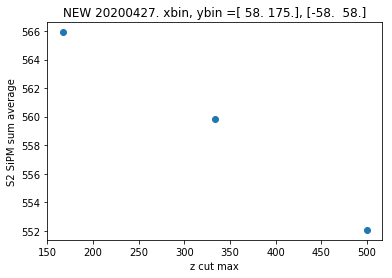

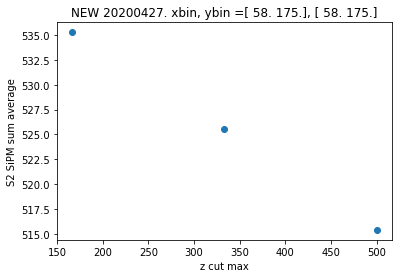

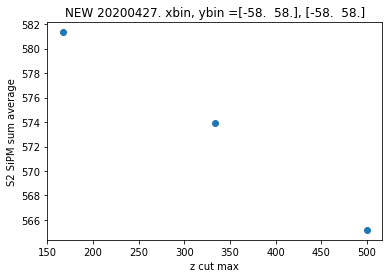

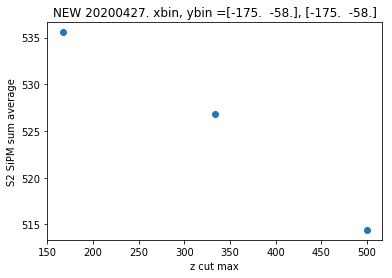

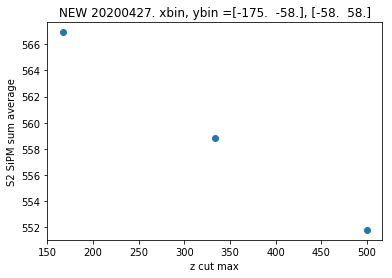

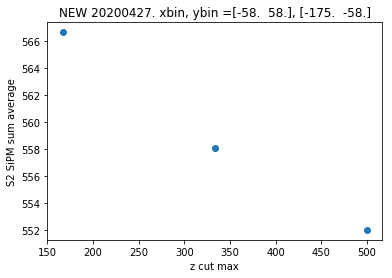

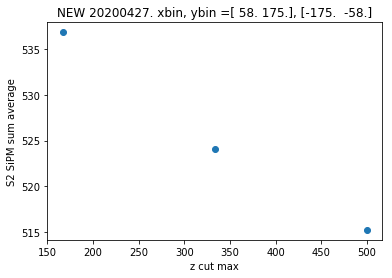

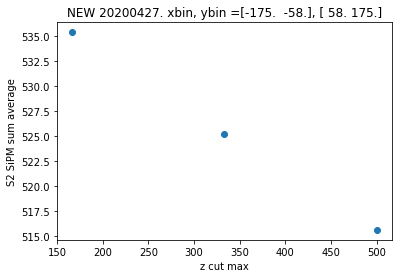

In [16]:
for xyb in xy_bins:
    S2s_SiPMs_avg_vZ = []
    zs = []
    for zb in z_bins:
        full_box = xyb + (zb,)
        box_i = get_index_from_box(full_box, xyz_boxes)
        zs.append(zb[1])
        S2s_SiPMs_avg_vZ.append(S2s_SiPMs_avg[box_i])
    plt.plot(zs, S2s_SiPMs_avg_vZ, 'o')
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S2 SiPM sum average')
    plt.show()

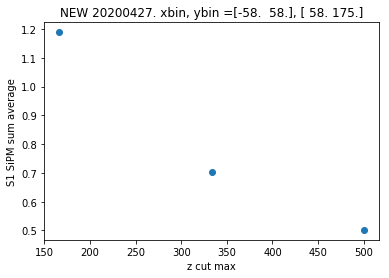

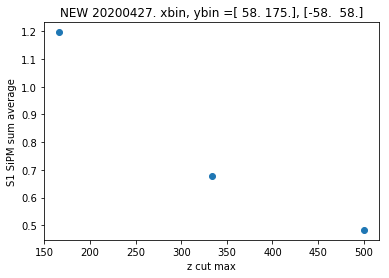

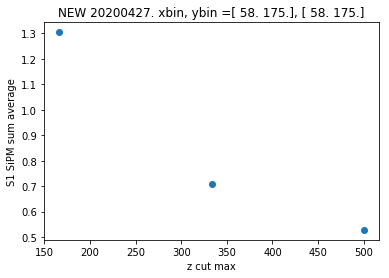

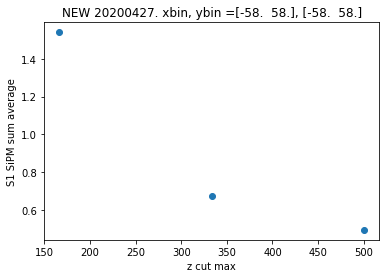

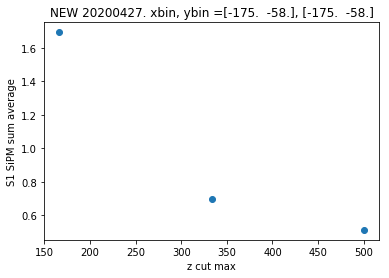

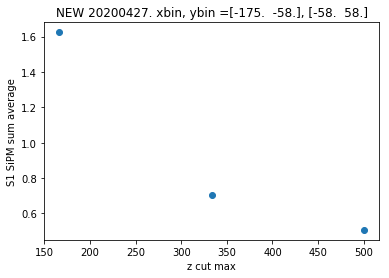

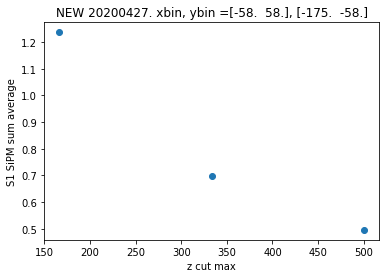

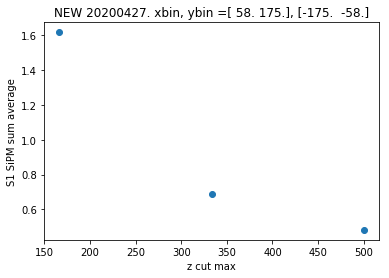

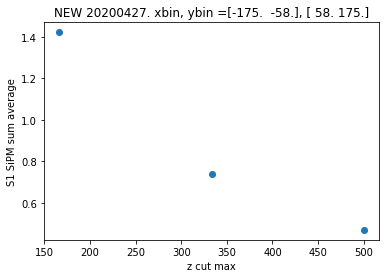

In [17]:
for xyb in xy_bins:
    S1s_SiPMs_avg_vZ = []
    zs = []
    for zb in z_bins:
        full_box = xyb + (zb,)
        box_i = get_index_from_box(full_box, xyz_boxes)
        zs.append(zb[1])
        S1s_SiPMs_avg_vZ.append(S1s_SiPMs_avg[box_i])
    plt.plot(zs, S1s_SiPMs_avg_vZ, 'o')
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S1 SiPM sum average')
    plt.show()

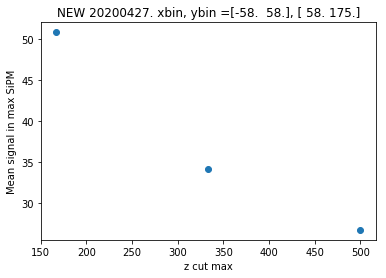

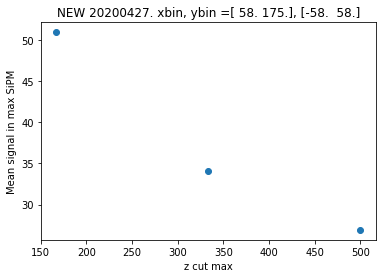

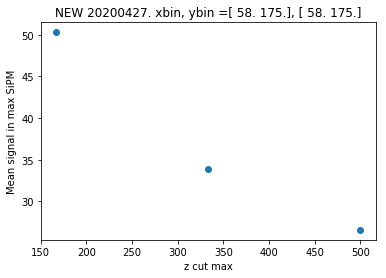

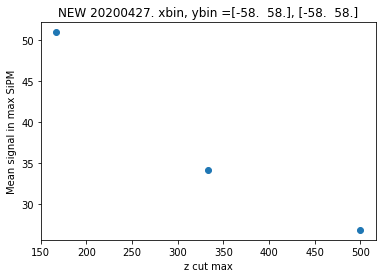

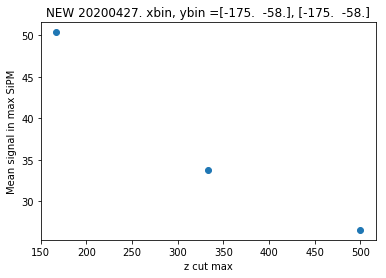

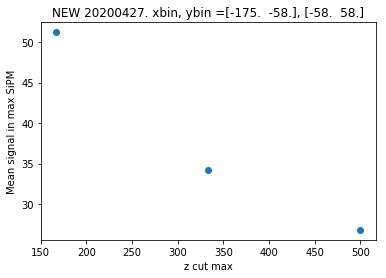

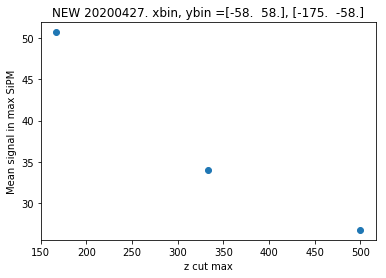

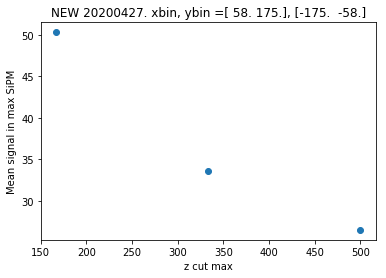

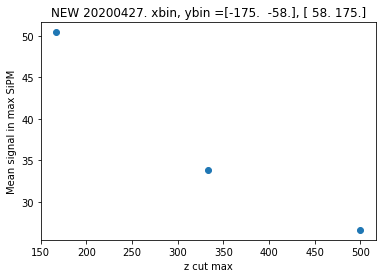

In [18]:
for xyb in xy_bins:
    Mean_max_sipm_box_avg_vZ = []
    zs = []
    for zb in z_bins:
        full_box = xyb + (zb,)
        box_i = get_index_from_box(full_box, xyz_boxes)
        zs.append(zb[1])
        Mean_max_sipm_box_avg_vZ.append(Mean_max_sipm_box_avg[box_i])
    plt.plot(zs, Mean_max_sipm_box_avg_vZ, 'o')
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('Mean signal in max SiPM')
    plt.show()

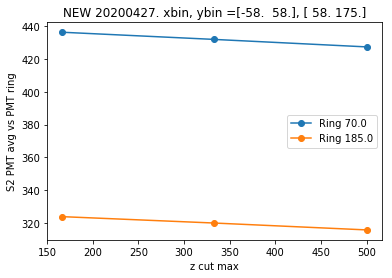

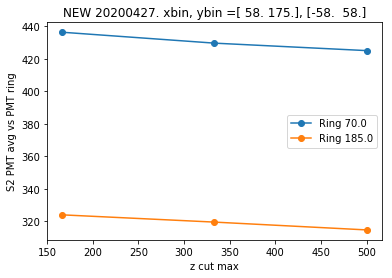

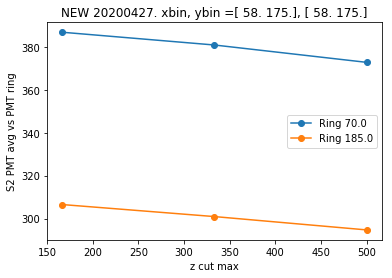

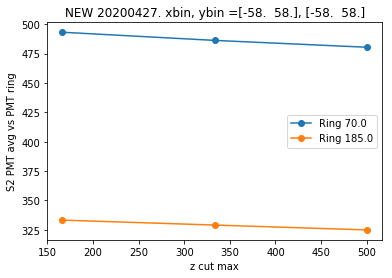

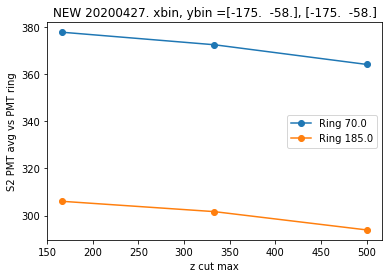

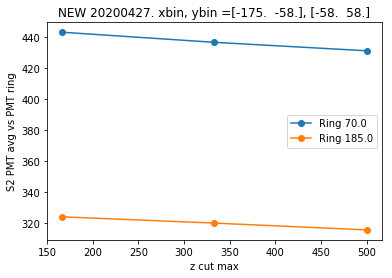

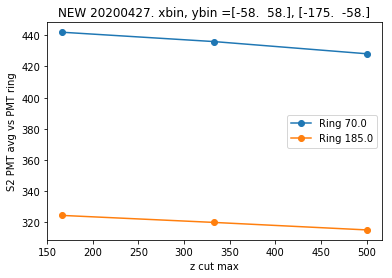

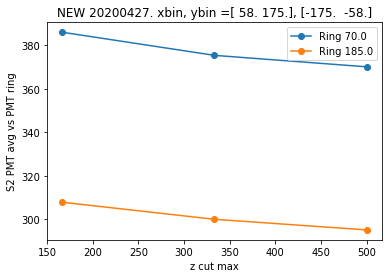

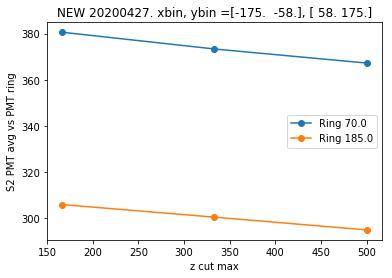

In [19]:
for xyb in xy_bins:
    for ring in rings:
        S2_matrix_PMT_pavg_ring_vZ = []
        zs = []
        for zb in z_bins:
            full_box = xyb + (zb,)
            zs.append(zb[1])
            box_i = get_index_from_box(full_box, xyz_boxes)
            S2_matrix_PMT_pavg_ring_vZ.append(S2_matrix_PMT_pavg[ring][box_i])
        zs, S2_matrix_PMT_pavg_ring_vZ = zip(*sorted(zip(zs, S2_matrix_PMT_pavg_ring_vZ)))
        plt.plot(zs, S2_matrix_PMT_pavg_ring_vZ, 'o-', label = 'Ring '+str(ring))
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S2 PMT avg vs PMT ring')
    plt.legend()
    plt.show()

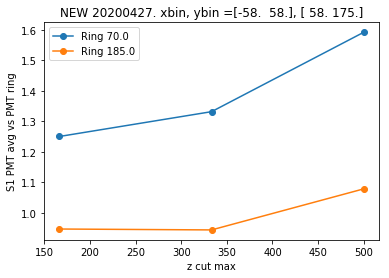

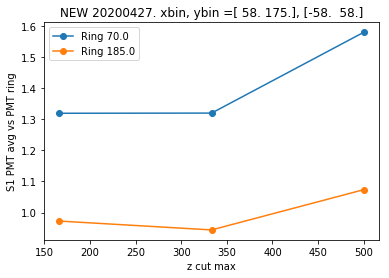

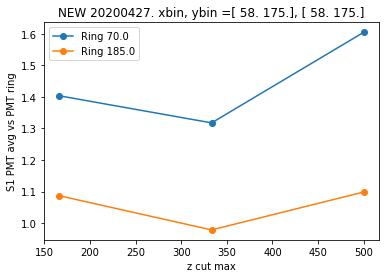

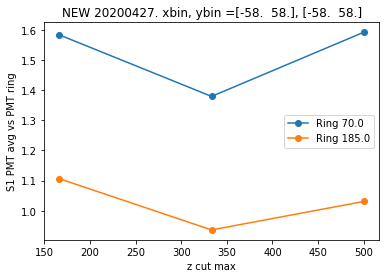

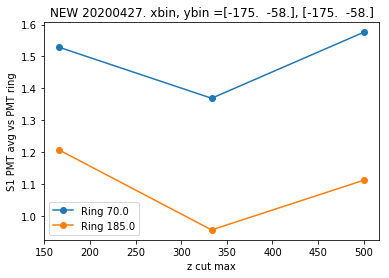

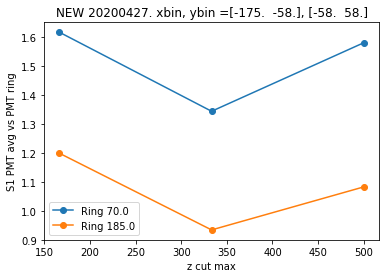

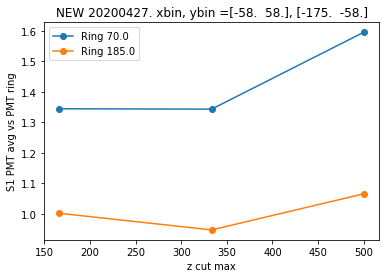

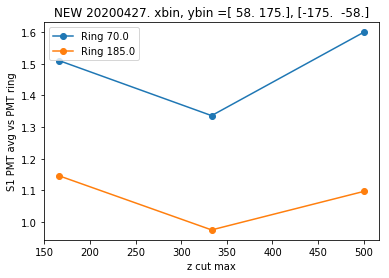

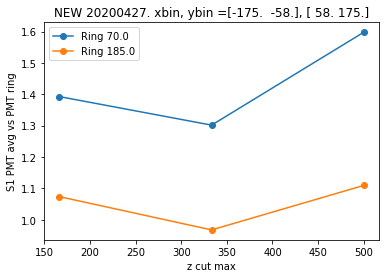

In [20]:
for xyb in xy_bins:
    for ring in rings:
        S1_matrix_PMT_pavg_ring_vZ = []
        zs = []
        for zb in z_bins:
            full_box = xyb + (zb,)
            zs.append(zb[1])
            box_i = get_index_from_box(full_box, xyz_boxes)
            S1_matrix_PMT_pavg_ring_vZ.append(S1_matrix_PMT_pavg[ring][box_i])
        zs, S1_matrix_PMT_pavg_ring_vZ = zip(*sorted(zip(zs, S1_matrix_PMT_pavg_ring_vZ)))
        plt.plot(zs, S1_matrix_PMT_pavg_ring_vZ, 'o-', label = 'Ring '+str(ring))
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S1 PMT avg vs PMT ring')
    plt.legend()
    plt.show()


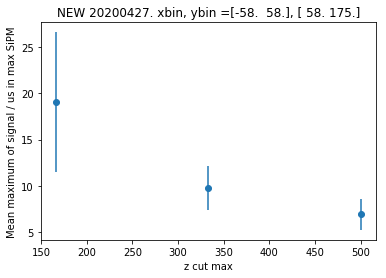

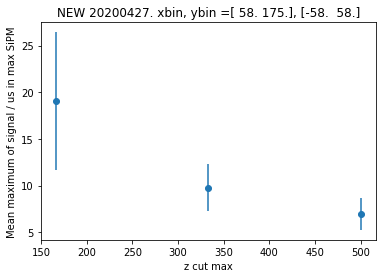

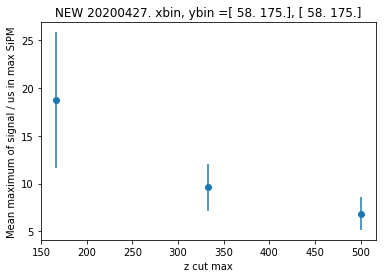

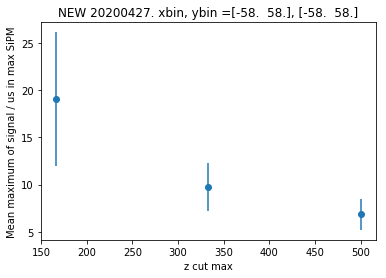

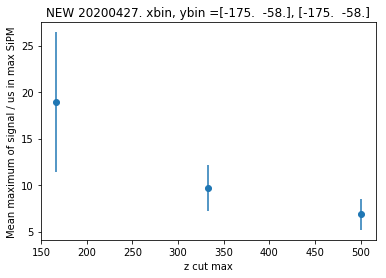

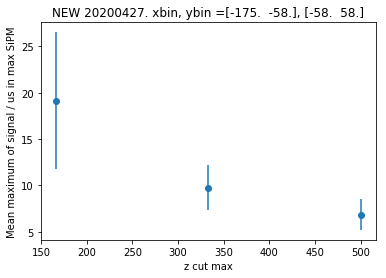

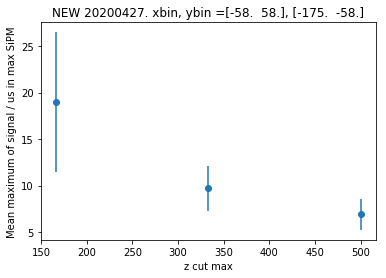

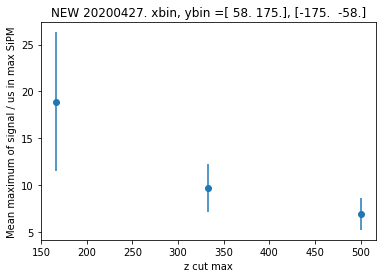

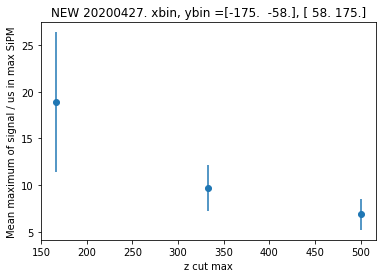

In [21]:
for xyb in xy_bins:
    Mean_maxperus_sipm_box_avg_vZ = []
    Std_maxperus_sipm_box_avg_vZ = []
    zs = []
    for zb in z_bins:
        full_box = xyb + (zb,)
        box_i = get_index_from_box(full_box, xyz_boxes)
        zs.append(zb[1])
        Mean_maxperus_sipm_box_avg_vZ.append(Mean_maxperus_sipm_box[box_i])
        Std_maxperus_sipm_box_avg_vZ.append(Std_maxperus_sipm_box[box_i])
    plt.errorbar(zs, Mean_maxperus_sipm_box_avg_vZ, yerr = Std_maxperus_sipm_box_avg_vZ,fmt='o')
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('Mean maximum of signal / us in max SiPM')
    plt.show()